## RF - Random Forest

Random Forest is a powerful ensemble learning method that operates by constructing a multitude of decision trees during training. Each tree in the forest independently predicts the target variable, and the final prediction is determined by averaging among these individual predictions (Breiman, 2001). This method has proven to be particularly effective in handling high-dimensional data and avoiding overfitting, which is crucial in our case (Hastie et al., 2009). Random Forest is renowned for its ability to solve both classification and regression problems and achieve robust performance even when training data is heavily noisy (Scikit-Learn Documentation). By combining multiple decision trees, Random Forest also reduces the risk of overfitting and improves the model's generalization capability (Breiman, 2001). These characteristics make Random Forest a popular choice in various fields, ranging from medical diagnosis to financial analysis.

In [38]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from Helper.Data import loadData
from Helper.Perform_CrossVal import perform_cross_validation
import pickle


pd.options.mode.chained_assignment = None

In [48]:
X_final, y, X_train, X_test, y_train, y_test, data, feature_columns, categorical_features,target_column, label_encoder = loadData()
X_final

,X,Y,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,PdDistrict_BAYVIEW,...,Events_Clear,Events_Fog,Events_Fog-Rain,Events_Rain,Events_Rain-Thunderstorm,Events_Thunderstorm,season_Autumn,season_Spring,season_Summer,season_Winter
0,-122.426995,37.800873,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-122.438738,37.771541,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-122.403252,37.713431,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-122.423327,37.725138,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-122.371274,37.727564,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395397,-122.431046,37.783030,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
395398,-122.414073,37.751685,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
395399,-122.389769,37.730564,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
395400,-122.447364,37.731948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Preliminary Testing

In Random Forest for multi-class classification, categorical features may require numerical encoding, but the target variable can be provided as either strings or integers directly, without needing binary transformation.

In [3]:
rf_clf = RandomForestClassifier(random_state=42)

The code initializes a Random Forest classifier named rf_clf, specifying two parameters:
- n_estimators: The n_estimators parameter in Random Forest determines the number of decision trees in the ensemble. Increasing it can improve performance, but it also increases training and prediction times. Too many trees may lead to overfitting and diminishing returns. In this case, 100 trees are used, which is a common default choice balancing between model performance and computational efficiency.
- random_state: ensures reproducibility of results by setting the random number generator seed for consistent model evaluation and comparison across different runs or environments.

In [4]:
# define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'f1_macro': 'f1_macro',
    'roc_auc_ovr': 'roc_auc_ovr'
}

# cross validation
cv_results = cross_validate(rf_clf, X_final, y, cv=4, scoring=scoring, return_train_score=True)

# average and std results
for metric in scoring.keys():
    print(f"Average {metric}: {np.mean(cv_results[f'test_{metric}']) * 100:.4f}%")
    print(f"Standard deviation {metric}: {np.std(cv_results[f'test_{metric}']) * 100:.4f}%")

# differences between train and test
for metric in scoring.keys():
    test_std = np.std(cv_results[f'test_{metric}'])
    train_std = np.std(cv_results[f'train_{metric}'])
    print(f"Difference in std between train and test {metric}: {(train_std - test_std) * 100:.4f}%")

with open('rf_cross_val_result.pkl', 'wb') as f:
    pickle.dump(cv_results, f)

Average accuracy: 41.8136%
Standard deviation accuracy: 1.9134%
Average f1_macro: 30.6033%
Standard deviation f1_macro: 1.7710%
Average roc_auc_ovr: 64.2488%
Standard deviation roc_auc_ovr: 0.5959%
Difference in std between train and test accuracy: -1.7746%
Difference in std between train and test f1_macro: -1.6224%
Difference in std between train and test roc_auc_ovr: -0.5644%


#### Preliminary Testing Crossvalidation Results
Given the context of a multiclass classification scenario with five different outcomes, let's delve into interpreting our cross-validation results:
- **Average Accuracy 41.81%**: In our initial testing, Random Forest demonstrated a low average accuracy of 41.8136% in a 5-fold cross-validation. Though better than random guessing, it still falls short. It appears to struggle with our multiclass problem too.
- **Standard Deviation of Accuracy 1.91%**: The model's performance remains stable across various subsets of our data.
- **Average Macro F1 Score 30.60%**: A score of 30.60% reflects a significant challenge, signaling that the model encounters difficulties with both precision and recall uniformly across all classes. This hints at potential issues in correctly recognizing all instances of a class or in distinguishing between classes without generating numerous incorrect predictions.
- **Standard Deviation of Macro F1 Score 1.77%**: A standard deviation of about 2%, is evident in the precision and recall of the model across folds. It doesn't exceed excessive levels.

- **Average ROC_AUC_OVR 64.25%**: A score of 64.25% indicates the model's proficiency in distinguishing between different categories. It's important to consider that this score might be even higher given the challenge of dealing with multiple classes.

- **Differences in Standard Deviation Between Train and Test (Accuracy, F1 Macro, ROC_AUC_OVR)**: The model being more consistent on the test set than on the training set, possibly indicating underfitting and reduced accuracy in capturing data complexity.

#### Preliminary Testing Crossvalidation Conclusion
Overall our model displays stable performance across folds but faces challenges in achieving high accuracy, particularly in precision and recall, resulting in a low F1 score. The ROC_AUC_OVR score indicates an acceptable level, however, there is still substantial potential for overall enhancement.

In [49]:
# Training the classifier
rf_clf.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf_clf.predict(X_test)

# Predicting the probabilities for the test set
y_pred_proba = rf_clf.predict_proba(X_test)

# Calculation of various metrics
# We use the “weighted” parameter because this takes imbalances into account
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Random Forest does not provide probability estimates directly like XGBoost
# For ROC-AUC score, we can only calculate it for binary or multiclass classification with one-vs-one or one-vs-rest strategy.
# Here, we'll calculate ROC-AUC score for binary classification since RandomForestClassifier does not output probabilities for multiclass directly.

lb = LabelBinarizer()
lb.fit(y_test)
y_test_binarized = lb.transform(y_test)
y_pred_binarized = lb.transform(y_pred)

roc_auc = roc_auc_score(y_test_binarized[:, 0], y_pred_proba[:, 1])  # Assuming binary classification

print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_clf, f)

Accuracy: 0.5288
F1-score: 0.5156
ROC-AUC Score: 0.4813


#### Preliminary Testing Prediction Results
- **Accuracy 52.88%**: An accuracy of 52.88% indicates that the model correctly predicts the outcome more than half of the time. While still showing room for improvement, this suggests the model is performing significantly better than expected in comparison to cross-validation results.
- **F1-score 51.563%**: The F1-score is 51.563, indicating room for improvement in balancing precision and recall, particularly in multiclass classification contexts where achieving high precision and recall is challenging.
- **ROC-AUC OVO Score 48.13%**: This score falls below 50%, suggesting challenges in distinguishing between the various classes.


#### Preliminary Testing Prediction Conclusion
The results are acceptable for preliminary testing, however, there is a clear need for improvement, particularly in enhancing the ROC for distinguishing different classes and other relevant scores above 50%.

### Feature Importance
We've created a plot showcasing important features in our random forest model. This visual helps identify key predictors essential for making decisions.

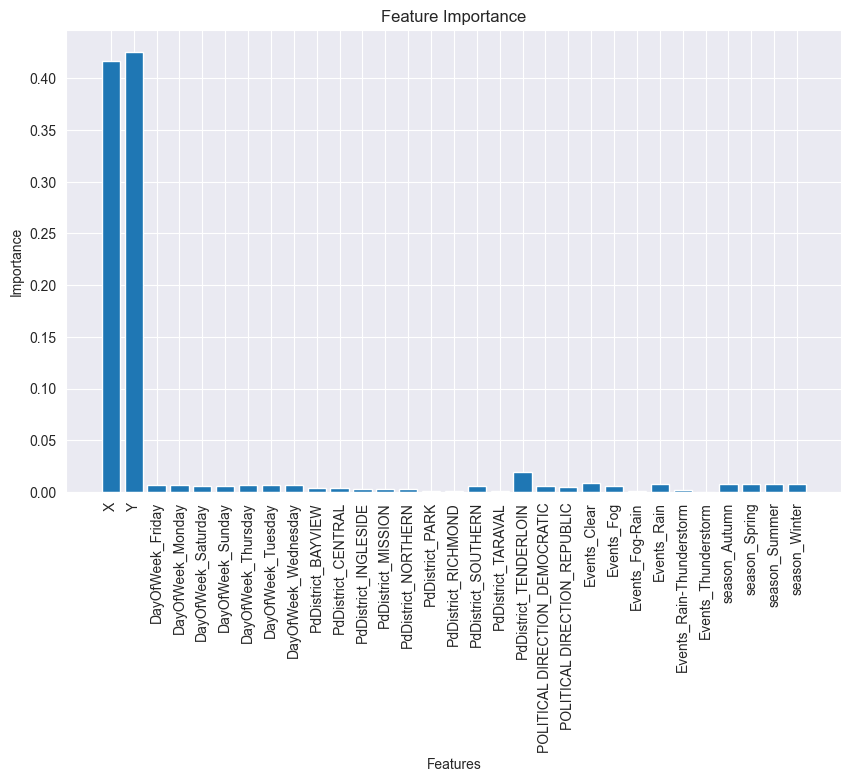

In [6]:
# extract feature importance
importance = rf_clf.feature_importances_
feature_names = X_train.columns.tolist()

# plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), feature_names, rotation=90)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

#### Feature Importance - Conclusion

In this plot of feature importance for our random forest model, we observe that two main features stand out with significantly higher values compared to the rest. Most features exhibit minimal influence on our model's predictions. Notably, the 'X' and 'Y' coordinates demonstrate importance scores exceeding 0.4, indicating their crucial role as predictors in our model. Many features barely contribute, with some scoring below 0.05. Among these, the feature 'PdDistrict_TENDERLOIN' stands out with a relatively higher score nearing 0.04, suggesting noteworthy deviation compared to other district features, warranting further investigation. Additionally, the 'Events_Clear' feature displays notable variation among other event-related features. Seasonal features exhibit slight variation, showing relatively equal importance among themselves, mirroring a similar trend for day and month features. This disparity in feature importance highlights potential issues such as overfitting or insufficient data representation

### Recursive Feature Elimination
We've plotted a feature ranking specific to our random forest model. This visualization elucidates the significance of each feature within the model's decision-making process, aiding in understanding its predictive capabilities.

Optimal number of features: 4
Selected features and their rankings:
X: Rank 1
Y: Rank 1
DayOfWeek_Friday: Rank 9
DayOfWeek_Monday: Rank 4
DayOfWeek_Saturday: Rank 13
DayOfWeek_Sunday: Rank 19
DayOfWeek_Thursday: Rank 6
DayOfWeek_Tuesday: Rank 11
DayOfWeek_Wednesday: Rank 12
PdDistrict_BAYVIEW: Rank 21
PdDistrict_CENTRAL: Rank 17
PdDistrict_INGLESIDE: Rank 20
PdDistrict_MISSION: Rank 22
PdDistrict_NORTHERN: Rank 18
PdDistrict_PARK: Rank 25
PdDistrict_RICHMOND: Rank 24
PdDistrict_SOUTHERN: Rank 7
PdDistrict_TARAVAL: Rank 27
PdDistrict_TENDERLOIN: Rank 1
POLITICAL DIRECTION_DEMOCRATIC: Rank 16
POLITICAL DIRECTION_REPUBLIC: Rank 1
Events_Clear: Rank 2
Events_Fog: Rank 14
Events_Fog-Rain: Rank 26
Events_Rain: Rank 10
Events_Rain-Thunderstorm: Rank 23
Events_Thunderstorm: Rank 28
season_Autumn: Rank 5
season_Spring: Rank 3
season_Summer: Rank 8
season_Winter: Rank 15


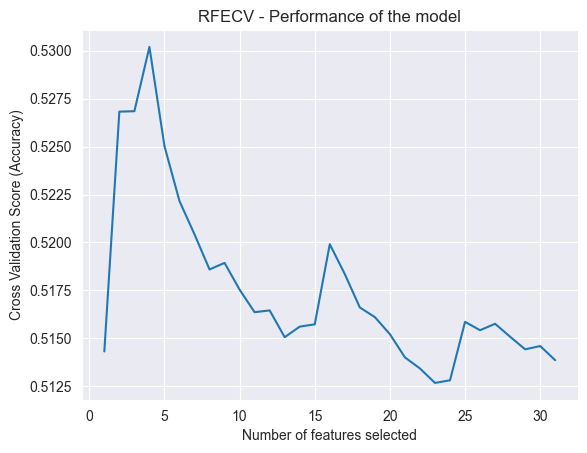

In [7]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
# initialise RFECV
cv_strategy = StratifiedKFold(n_splits=5)
rfecv = RFECV(estimator=rf_clf, step=1, cv=cv_strategy, scoring='accuracy')

# RFECV fit
rfecv.fit(X_train, y_train)

# print optimal number of features
print("Optimal number of features: %d" % rfecv.n_features_)

# Extracting the feature names based on RFECV support
#selected_features = X_train.columns[rfecv.support_]

# Output of the selected feature names and their rankings
print("Selected features and their rankings:")
for rank, feature in zip(rfecv.ranking_, X_train.columns):
    print(f"{feature}: Rank {rank}")

# Plot
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross Validation Score (Accuracy)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.title('RFECV - Performance of the model')
plt.show()

#### Recursive Feature Elimination - Conclusion

After conducting Recursive Feature Elimination with Cross-Validation (RFECV), we've determined that the ideal number of features for optimal performance is **4**. This selected subset comprises the most influential features, contributing to a commendable cross-validation score just above 0.53. Features with lower ranks are prioritized for inclusion in the optimal set, while those with higher ranks, exceeding 1 in this instance are considered less critical and are likely excluded from the final subset

### Confusion Matrix
We've constructed a confusion matrix. This matrix provides a comprehensive breakdown of the model's performance by showcasing the true positives, true negatives, false positives, and false negatives.

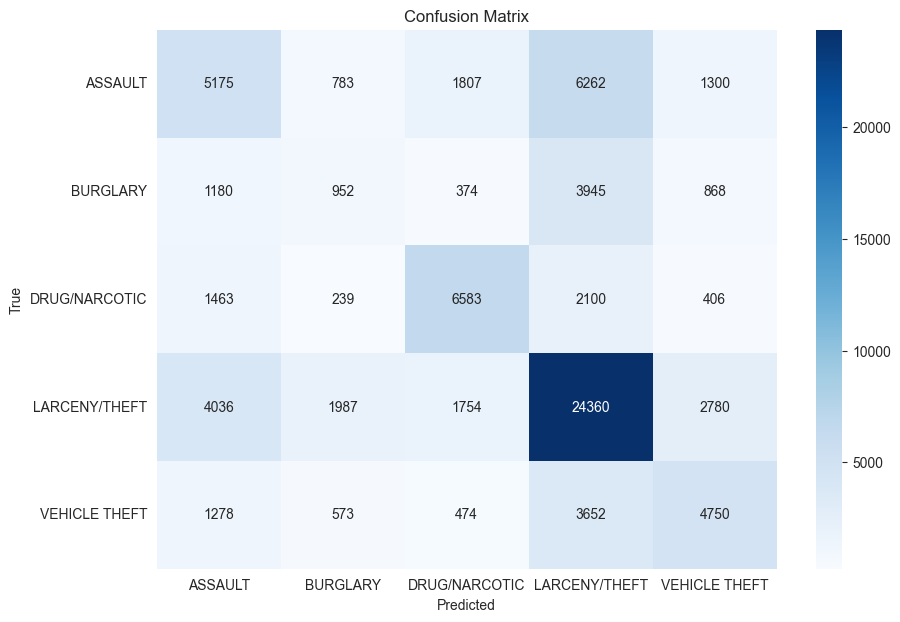

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
y_test_names = label_encoder.inverse_transform(y_test)
cm = confusion_matrix(y_test_names, label_encoder.inverse_transform(y_pred)) # Annahme, dass y_pred die Vorhersagen sind
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Confusion Matrix - Conclusion
The Random Forest model accurately predicted instances of 'BURGLARY' better than the XGBoost model, with 952 correct predictions compared to only 35. However, it struggled slightly more in correctly identifying instances of 'LARCENY/THEFT' compared to XGBoost, with 24,360 correct predictions compared to 30,106. When it came to mistakes, the Random Forest model tended to mix up "LARCENY/THEFT" with "ASSAULT" more frequently, making 4,036 such errors. Additionally, it often misclassified "ASSAULT" as "DRUG/NARCOTIC", with 1,807 instances of this error. Despite these challenges, the Random Forest model performed well in predicting "DRUG/NARCOTIC" and "LARCENY/THEFT", showcasing its strength in these areas. However, it struggled with "BURGLARY" and had difficulty distinguishing between certain crime types like "ASSAULT" and "LARCENY/THEFT". While the Random Forest model demonstrated good predictive capabilities in some areas, it showed weaknesses in accurately identifying specific crime types and avoiding misclassifications, particularly between closely related categories.


### ROC - Curve

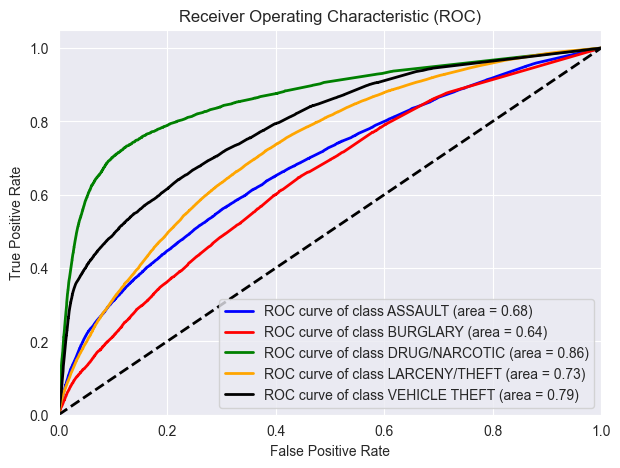

In [18]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

n_classes = y_test_binarized.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['blue', 'red', 'green', 'orange', 'black'])

# plot ROC
plt.figure(figsize=(7, 5))
for i, color in zip(range(n_classes), colors):
    # Ersetzen von `i` durch `label_encoder.classes_[i]` für die Klassennamen
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(label_encoder.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In terms of the ROC curve and AUC, when focusing solely on 'DRUG/NARCOTIC', the Random Forest model shows a higher AUC compared to the other categories. When comparing the Random Forest model specifically to the XGBoost model and focusing only on 'VEHICLE/THEFT', the AUC (Area Under the Curve) for 'VEHICLE/THEFT' is higher in the Random Forest mode.

### Precision-Recall Curve

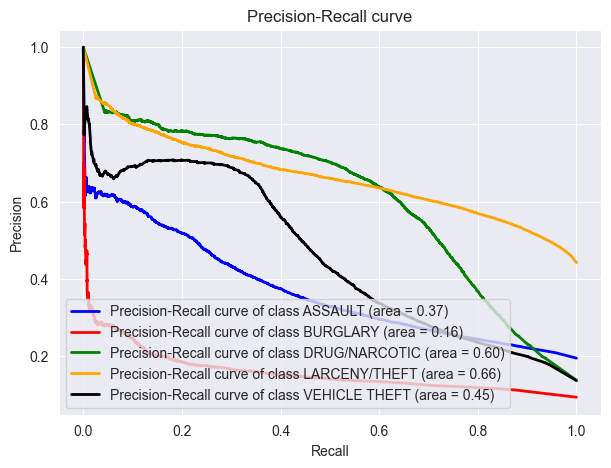

In [50]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
from itertools import cycle

n_classes = y_test_binarized.shape[1]
precision = dict()
recall = dict()
average_precision = dict()

colors = cycle(['blue', 'red', 'green', 'orange', 'black'])

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i],
                                                        y_pred_proba[:, i])
    average_precision[i] = average_precision_score(y_test_binarized[:, i], y_pred_proba[:, i])

# plot
plt.figure(figsize=(7, 5))
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label='Precision-Recall curve of class {0} (area = {1:0.2f})'
             ''.format(label_encoder.classes_[i], average_precision[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()

#### Precision-Recall Curve - Conclusion

- **ASSAULT (Red Curve)**: The model moderately distinguishes between positive and negative assault instances, with an AUC of 0.37. There's room for precision improvement.
- **BURGLARY (Green Curve)**: Scoring only 0.16 AUC, the model performs poorly in identifying burglary instances, with low precision and recall. It's the worst-performing class.
- **DRUG/NARCOTIC (Dark Blue Curve)**: AUC of 0.60 indicates better identification of drug/narcotic instances, balancing precision and recall.
- **LARCENY/THEFT (Light Blue Curve)**: Leading with 0.66 AUC, the model excels in precise identification of larceny/theft cases across various recall levels.
- **VEHICLE THEFT (Orange Curve)**: With 0.45 AUC, the model's performance in vehicle theft resembles that of assault, indicating room for improvement.


### GridSearchCV in Model Optimization

In [10]:
from sklearn.model_selection import GridSearchCV

# grid
param_grid = {
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# GridSearchCV-initialization
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, scoring='accuracy', cv=4, n_jobs=-1)

# search for best params
grid_search.fit(X_train, y_train)

# scores
print(f"Best Parameter: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_ * 100:.2f}%")
with open('rfgrid_search.pkl', 'wb') as f:
    pickle.dump(grid_search, f)

Best Parameter: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 49.89%


### Parameters

**'max_depth': 5:** The maximum depth of a tree limits how detailed the model can learn the data structures. A depth of 5 is a compromise between the model’s ability to recognize patterns in the data and the risk of overfitting. It allows for some complexity in the model predictions without diving too deeply into the data.

**'max_features': None:** This parameter determines the maximum number of features to consider when looking for the best split. Setting it to None means that all features will be considered at each split, which can be beneficial for ensuring the model can capture all relevant information present in the data.

**'min_samples_leaf': 1:** The minimum number of samples required to be at a leaf node. A value of 1 means that even individual data points can form their own leaf nodes, which can lead to more complex decision boundaries and potentially overfitting if not carefully tuned.

**'min_samples_split'= 2:** The minimum number of samples required to split an internal node. Setting it to 2 means that the tree will continue to split nodes until each node contains only one sample or until the minimum number of samples required for a split is reached.

**'n_estimators': 100:** This number indicates how many trees to build in the ensemble model. 100 trees mean the model tries to learn from the errors of 99 previous trees to improve predictions. A higher number of estimators can improve model performance, but also leads to longer training time and increased risk of overfitting if not controlled by other measures.

**'Accuracy': 49.89%:** This number indicates the best accuracy achieved by the model using the hyperparameters mentioned above. An accuracy of just under 50% suggests that the model is only slightly better than random guessing, assuming a binary classification task. However, for multiclass classification or with a very balanced dataset, this might represent acceptable performance.

In [19]:
best_params = grid_search.best_params_

best_rf_clf = RandomForestClassifier(**best_params, random_state=42)

best_rf_clf.fit(X_train, y_train)
y_pred = best_rf_clf.predict(X_test)

# Calculate accuracy, F1-score, and ROC-AUC
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, best_rf_clf.predict_proba(X_test), multi_class='ovr', average='weighted')

# Print evaluation metrics
print(f"Accuracy on test data: {accuracy:.4f}")
print(f"F1-score on test data: {f1:.4f}")
print(f"ROC-AUC on test data: {roc_auc:.4f}")

with open('random_forest_model2.pkl', 'wb') as f:
    pickle.dump(best_rf_clf, f)

Accuracy on test data: 0.4639
F1-score on test data: 0.3483
ROC-AUC on test data: 0.6099


### Adjusted Training
Following preliminary testing and feature evaluation, we'll refine our classifier. We'll identify and temporarily remove dominant features "X" and "Y" to reassess the model's performance. This allows us to compare adjusted training results with initial testing outcomes.

In [40]:
# drop the most dominant feature
X_train = X_train.drop(columns=['X', 'Y'])
X_test = X_test.drop(columns=['X', 'Y'])

In [13]:
rf_clf = RandomForestClassifier(random_state=42)

cv_results = perform_cross_validation(rf_clf, X_train, y_train)

for key, value in cv_results.items():
 print(f"{key}: {value:.2f}%")

with open('rf_cross_val_result2.pkl', 'wb') as f:
    pickle.dump(cv_results, f)

Average accuracy: 46.33%
Standard deviation accuracy: 0.04%
Difference in std between train and test accuracy: -0.03%
Average f1_macro: 26.07%
Standard deviation f1_macro: 0.14%
Difference in std between train and test f1_macro: -0.01%
Average roc_auc_ovr: 64.75%
Standard deviation roc_auc_ovr: 0.17%
Difference in std between train and test roc_auc_ovr: -0.12%


Accuracy: 0.4629
F1-score: 0.3728%
ROC-AUC Score: 0.6442


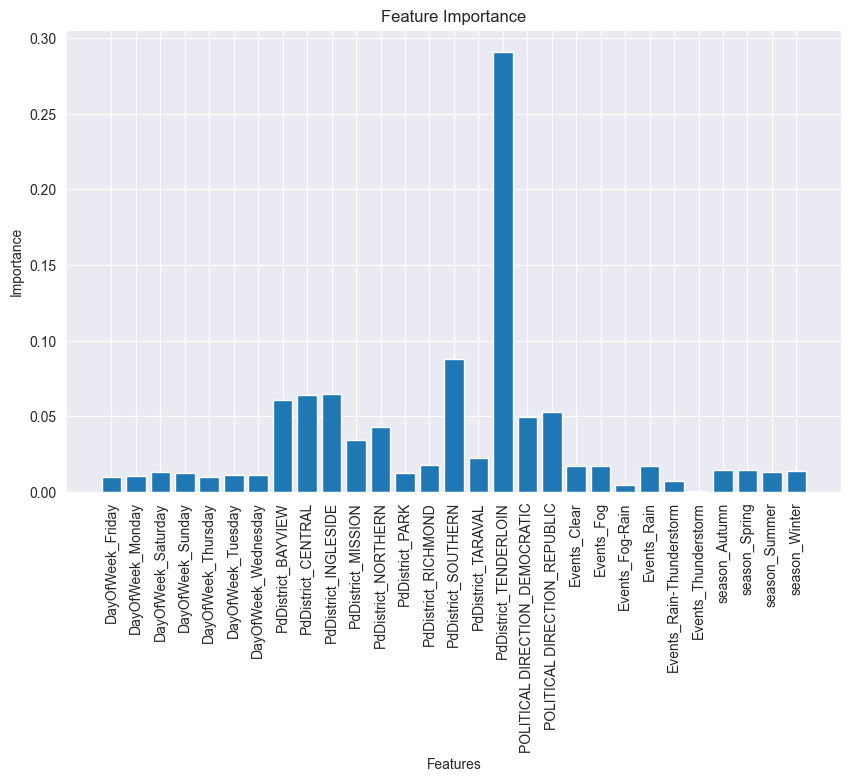

In [41]:
from Helper.Evaluate_RandomForestModel import evaluate_rf_model

rf_clf, accuracy, f1, roc_auc = evaluate_rf_model(X_train, y_train, X_test, y_test)
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}%")
print(f"ROC-AUC Score: {roc_auc:.4f}")
importance = rf_clf.feature_importances_
feature_names = X_train.columns.tolist()

# FI plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), feature_names, rotation=90)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

with open('rf_model3.pkl', 'wb') as f:
    pickle.dump(rf_clf, f)

#### Re-Evaluated Feature Importance Results
When we removed features 'X' and 'Y' from our model and re-evaluated its performance, we observed a notable increase in the importance score of the 'PdDistrict_TENDERLOIN' feature. This change implies a significant connection between the dropped features 'X' and 'Y' and the 'PdDistrict_TENDERLOIN'. It suggests that the presence or characteristics of 'X' and 'Y' were somehow intertwined with or influenced by the 'PdDistrict_TENDERLOIN'. Consequently, their removal caused a shift in importance, highlighting the relevance of 'PdDistrict_TENDERLOIN' in our model. Given its significant importance, understanding why 'PdDistrict_TENDERLOIN' carries such weight is crucial. Additionally, the presence of other district features with moderate importance scores between 0.05 and 0.1 indicates the collective contribution of district-related information to our model's performance. Moreover, the high-scoring political direction feature adds another layer of complexity. It's important to explore whether 'PdDistrict_TENDERLOIN' offers unique insights or if its predictive power overlaps with other features, such as the political direction feature.

The findings from the REFC indicate that our model's efficiency begins to decline after incorporating four features. Consequently, we have decided to retain only the following features: "PdDistrict_CENTRAL," "PdDistrict_INGLESIDE," "PdDistrict_SOUTHERN," and "PdDistrict_TENDERLOIN," while dropping all others.

In [43]:
features_to_drop = [
    "DayOfWeek_Friday",
    "DayOfWeek_Monday", "DayOfWeek_Saturday",
    "DayOfWeek_Sunday", "DayOfWeek_Thursday",
    "DayOfWeek_Tuesday", "DayOfWeek_Wednesday",
    "PdDistrict_BAYVIEW",  "PdDistrict_MISSION",
    "PdDistrict_NORTHERN", "PdDistrict_PARK",
    "PdDistrict_RICHMOND", "PdDistrict_TARAVAL",
    "POLITICAL DIRECTION_DEMOCRATIC", "POLITICAL DIRECTION_REPUBLIC",
    "Events_Clear", "Events_Fog", "Events_Fog-Rain", "Events_Rain",
    "Events_Rain-Thunderstorm", "Events_Thunderstorm", "season_Autumn",
    "season_Spring", "season_Summer", "season_Winter"
]

X_train = X_train.drop(columns=features_to_drop)
X_test = X_test.drop(columns=features_to_drop)
X_train

,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_SOUTHERN,PdDistrict_TENDERLOIN
291487,0.0,0.0,0.0,0.0
57507,0.0,0.0,0.0,1.0
279522,0.0,0.0,0.0,0.0
82977,0.0,0.0,0.0,0.0
309659,0.0,0.0,0.0,1.0
...,...,...,...,...
57669,0.0,1.0,0.0,0.0
98509,1.0,0.0,0.0,0.0
247485,0.0,0.0,0.0,0.0
300143,0.0,0.0,0.0,0.0


In [44]:
best_params = {
    'max_depth': 5,
    'max_features': None,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 100
}

best_rf_clf, accuracy, f1, roc_auc = evaluate_rf_model(X_train, y_train, X_test, y_test, best_params)
print(f"Accuracy on test data: {accuracy:.4f}%")
print(f"F1-score on test data: {f1:.4f}%")
print(f"ROC-AUC on test data: {roc_auc:.4f}")

with open('rf_model4.pkl', 'wb') as f:
    pickle.dump(best_rf_clf, f)

Accuracy on test data: 0.4615%
F1-score on test data: 0.3261%
ROC-AUC on test data: 0.6031


#### Adjusted Training Confusion Matrix

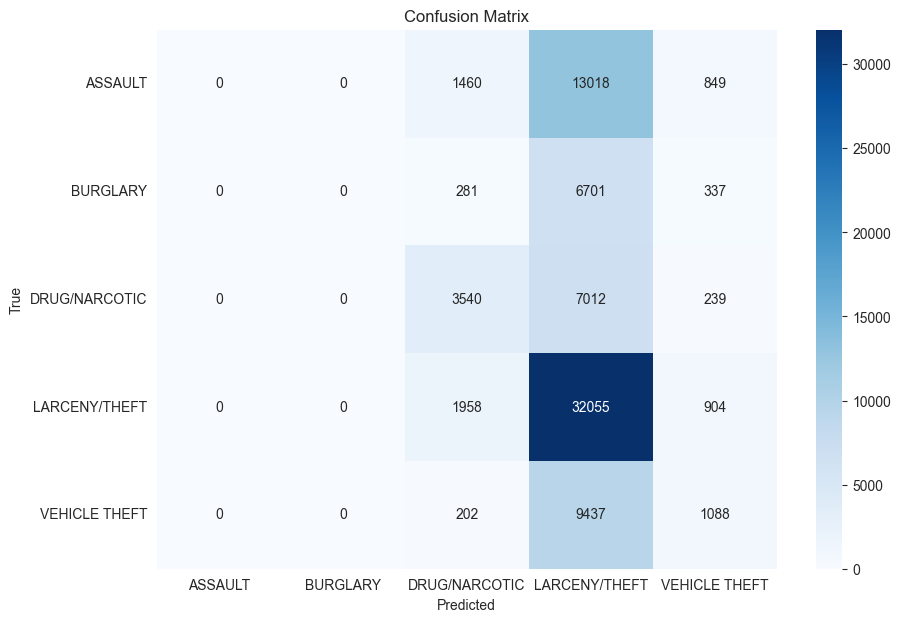

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
y_test_names = label_encoder.inverse_transform(y_test)
cm = confusion_matrix(y_test_names, label_encoder.inverse_transform(y_pred)) # Annahme, dass y_pred die Vorhersagen sind
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Adjusted Training ROC - Curve

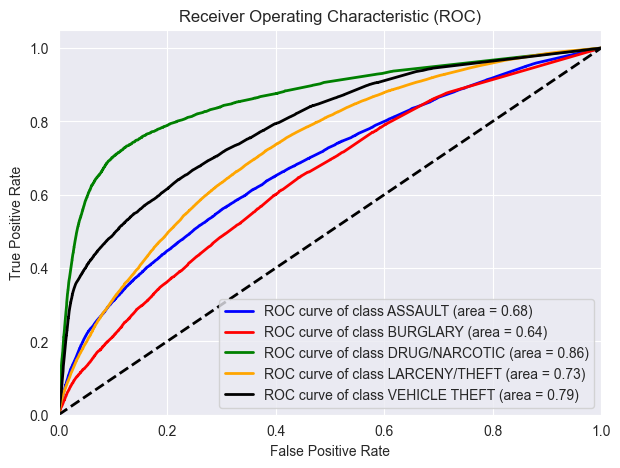

In [46]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

n_classes = y_test_binarized.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['blue', 'red', 'green', 'orange', 'black'])

# plot ROC
plt.figure(figsize=(7, 5))
for i, color in zip(range(n_classes), colors):
    # Ersetzen von `i` durch `label_encoder.classes_[i]` für die Klassennamen
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(label_encoder.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#### Adjusted Precision-Recall Curve

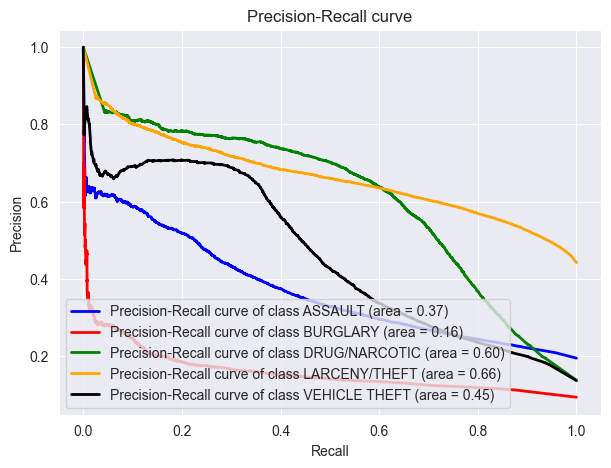

In [47]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
from itertools import cycle

n_classes = y_test_binarized.shape[1]
precision = dict()
recall = dict()
average_precision = dict()

colors = cycle(['blue', 'red', 'green', 'orange', 'black'])

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i],
                                                        y_pred_proba[:, i])
    average_precision[i] = average_precision_score(y_test_binarized[:, i], y_pred_proba[:, i])

# plot
plt.figure(figsize=(7, 5))
for i, color in zip(range(n_classes), colors):
    # Replace 'i' with 'label_encoder.classes_[i]' to use the actual class names
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label='Precision-Recall curve of class {0} (area = {1:0.2f})'
             ''.format(label_encoder.classes_[i], average_precision[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()

# References

- Breiman, Leo. "Random Forests." Machine Learning, 45(1), 5-32, 2001.
- Hastie, Trevor, Robert Tibshirani, Jerome Friedman. "The Elements of Statistical Learning: Data Mining, Inference, and Prediction." Springer, 2009.
- Scikit-Learn Documentation.